# Tests cortitos

### Importamos la librerías necesarias

In [1]:
import subprocess
import time
from tqdm import tqdm

### Definimos las funciones necesarias para correr las funciones de C++ y chequearlas

In [2]:
# Corre alguna de las funciones de C++ (especificando el metodo segun el README.md),
# guarda el archivo de salida en la misma carpeta y devuelve el tiempo de computo.
def runMethod(filePATH, method, outputPATH):
    process = subprocess.run(['./tp01', filePATH, outputPATH, str(method)])


def equalWithError(a, b, e):
    ans = True
    if (a + e < b - e or a - e > b + e):
        ans = False
    return ans


# Chequea que el output de un test sea igual que el esperado.
def checkOutput(outputPATH, expectedPATH, error):
    output = open(outputPATH, 'r').readlines()
    expected = open(expectedPATH, 'r').readlines()
    
    if len(output) != len(expected):
        return 'ERROR: El output y el expected no miden lo mismo.' 
    else:
        ans = True
        for line in range(len(output)):
            if not equalWithError(float(output[line]), float(expected[line]), error):
                ans = False
        if ans:
            return f'El output es igual al esperado con un error de {error}.'
        else:
            return f'El output no es igual al esperado.'
    output.close()
    expected.close()

### Usamos los tests que armamos para chequear las funciones

In [3]:
testWPPATH = 'src/TestsWP/'
testCMMPATH = 'src/TestsCMM/'
testCMMPATHCompletos = 'src/TestsCMM/test_completos/'

tests = ['test1', 'test2', 'test-prob-1', 'test-prob-2']
testsCompletos = ['test_completo_10_1', 'test_completo_100_8', 'test_completo_100_4', 'test_completo_1000_8','test_completo_1000_2']

error = 1e-4

In [4]:
for i in range(len(tests)):
    runMethod(testWPPATH + tests[i] + '.in', 1, testWPPATH + tests[i] + '.out')
    runMethod(testCMMPATH + tests[i] + '.in', 0, testCMMPATH + tests[i] + '.out')
    runMethod(testCMMPATHCompletos + testsCompletos[i] + '.in', 0, testCMMPATHCompletos + testsCompletos[i] + '.out')


print('-------- WP Tests --------')
for i in range(len(tests)):
    print(tests[i] + ': ' + checkOutput(testWPPATH + tests[i] + '.out', testWPPATH + tests[i] + '.expected', error))

print('-------- CMM Tests --------')
for i in range(len(tests)):
    print(tests[i] + ': ' + checkOutput(testCMMPATH + tests[i] + '.out', testCMMPATH + tests[i] + '.expected', error))
    
print('-------- CMM Tests Completos  --------')
for i in range(len(tests)):
    print(tests[i] + ': ' + checkOutput(testCMMPATHCompletos + testsCompletos[i] + '.out', testCMMPATHCompletos + testsCompletos[i] + '.expected', error))
    

-------- WP Tests --------
test1: El output es igual al esperado con un error de 0.0001.
test2: El output es igual al esperado con un error de 0.0001.
test-prob-1: El output es igual al esperado con un error de 0.0001.
test-prob-2: El output es igual al esperado con un error de 0.0001.
-------- CMM Tests --------
test1: El output es igual al esperado con un error de 0.0001.
test2: El output es igual al esperado con un error de 0.0001.
test-prob-1: El output es igual al esperado con un error de 0.0001.
test-prob-2: El output es igual al esperado con un error de 0.0001.
-------- CMM Tests Completos  --------
test1: El output es igual al esperado con un error de 0.0001.
test2: El output es igual al esperado con un error de 0.0001.
test-prob-1: El output es igual al esperado con un error de 0.0001.
test-prob-2: El output es igual al esperado con un error de 0.0001.


# Tests posta

### Definimos los archivos con equipos de NBA (Basketball) y jugadores de ATP (Tennis).

In [5]:
import pandas as pd


teamsNBA = pd.read_csv('data/nba_2016_teams.csv', names=['id', 'team'])
scoresNBA = pd.read_csv('data/nba_2016_scores.csv', names=['???', 'date', 'team1', 'loca1', 'score1', 'team2', 'local2', 'score2'])

## NBA

### Usemos el csv que tenemos con los partidos de la NBA (*National Basketball Association*).

In [6]:
print('------ Equipos ------')
display(teamsNBA)
print('------ Partidos ------')
display(scoresNBA)

------ Equipos ------


,id,team
0,1,Atlanta
1,2,Boston
2,3,Brooklyn
3,4,Charlotte
4,5,Chicago
5,6,Cleveland
6,7,Dallas
7,8,Denver
8,9,Detroit
9,10,Golden_State


------ Partidos ------


,???,date,team1,loca1,score1,team2,local2,score2
0,736263,20151027,9,-1,106,1,1,94
1,736263,20151027,5,1,97,6,-1,95
2,736263,20151027,10,1,111,19,-1,95
3,736264,20151028,30,-1,88,22,1,87
4,736264,20151028,2,1,112,23,-1,95
...,...,...,...,...,...,...,...,...
997,736403,20160315,22,1,116,8,-1,110
998,736403,20160315,3,1,131,23,-1,114
999,736403,20160315,28,-1,107,17,1,89
1000,736403,20160315,27,1,108,13,-1,87


### Hagamos un archivo .in que tenga la info de los partidos.

In [7]:
file = open('data/nba_2016_scores.in', 'w+')
file.write(str(len(teamsNBA)) + ' ' + str(len(scoresNBA)) + '\n')

for i in range(len(scoresNBA)):
    file.write(str(scoresNBA.loc[i, 'date']) + ' ' + str(scoresNBA.loc[i, 'team1']) + ' ' + 
               str(scoresNBA.loc[i, 'score1']) + ' ' + str(scoresNBA.loc[i, 'team2']) + ' ' + 
               str(scoresNBA.loc[i, 'score2']) + '\n')
file.close()

### Ejecutemos las funciones WP y CMM para estos equipos.

In [8]:
runMethod('data/nba_2016_scores.in', 0, 'data/nba_2016_scores_0.out')
runMethod('data/nba_2016_scores.in', 1, 'data/nba_2016_scores_1.out')

### Veamos el ranking según WP y CMM.

In [9]:
fileCMM = open('data/nba_2016_scores_0.out', 'r').readlines()
fileWP = open('data/nba_2016_scores_1.out', 'r').readlines()
ratingCMM = []
ratingWP = []
for line in fileCMM:
    ratingCMM.append(float(line))
for line in fileWP:
    ratingWP.append(float(line))

teamsNBA.insert(2, 'ratingCMM', ratingCMM)
teamsNBA.insert(3, 'ratingWP', ratingWP)
display(teamsNBA)

,id,team,ratingCMM,ratingWP
0,1,Atlanta,0.558822,0.567164
1,2,Boston,0.565690,0.582090
2,3,Brooklyn,0.290736,0.283582
3,4,Charlotte,0.558224,0.560606
4,5,Chicago,0.516007,0.507692
5,6,Cleveland,0.692428,0.712121
6,7,Dallas,0.502178,0.507463
7,8,Denver,0.420858,0.411765
8,9,Detroit,0.500250,0.507463
9,10,Golden_State,0.874063,0.909091


In [10]:
print('------ Ranking CMM ------')

teamsNBA_ordered = teamsNBA.sort_values(by=['ratingCMM', 'ratingWP'], ascending=(False, False))
display(teamsNBA_ordered)

print('------ Ranking WP ------')

teamsNBA_ordered = teamsNBA.sort_values(by=['ratingWP', 'ratingCMM'], ascending=(False, False))
display(teamsNBA_ordered)

------ Ranking CMM ------


,id,team,ratingCMM,ratingWP
9,10,Golden_State,0.874063,0.909091
26,27,San_Antonio,0.803976,0.850746
5,6,Cleveland,0.692428,0.712121
27,28,Toronto,0.659347,0.681818
20,21,Oklahoma_City,0.655552,0.671642
12,13,LA_Clippers,0.629708,0.636364
15,16,Miami,0.577367,0.582090
1,2,Boston,0.565690,0.582090
14,15,Memphis,0.563176,0.582090
0,1,Atlanta,0.558822,0.567164


------ Ranking WP ------


,id,team,ratingCMM,ratingWP
9,10,Golden_State,0.874063,0.909091
26,27,San_Antonio,0.803976,0.850746
5,6,Cleveland,0.692428,0.712121
27,28,Toronto,0.659347,0.681818
20,21,Oklahoma_City,0.655552,0.671642
12,13,LA_Clippers,0.629708,0.636364
15,16,Miami,0.577367,0.582090
1,2,Boston,0.565690,0.582090
14,15,Memphis,0.563176,0.582090
0,1,Atlanta,0.558822,0.567164


## EFL

### Usemos el csv que tenemos con los partidos de la Premier League de la EFL (*English Football League*)

In [11]:
dataEFL = pd.read_csv('data/Liga_Inglesa.csv')
display(dataEFL)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,...,2.31,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,...,2.95,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,2.29,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,...,2.07,19,-0.50,2.13,2.08,1.85,1.80,1.91,3.81,4.15


### Asignémosle un id a cada equipo de la liga.

In [12]:
team_to_id = {}
id_to_team = {}
i = 1
for j in tqdm(range(len(dataEFL.loc[:, 'HomeTeam']))):
    home = dataEFL.loc[j, 'HomeTeam']
    away = dataEFL.loc[j, 'AwayTeam']
    if not (home in team_to_id):
        team_to_id.update({home: i})
        id_to_team.update({i: home})
        i += 1
    if not (away in team_to_id):
        team_to_id.update({away: i})
        id_to_team.update({i: away})
        i += 1

100%|██████████| 380/380 [00:00<00:00, 66838.69it/s]


### Ahora armemos el .in. Ya que en el fútbol pueden haber empates entonces pongamos al equipo visitante siempre a la derecha y al local a la izquierda. Por cómo está armado el algoritmo de CMM esto nos asegura que en caso de empate el ganador sea el equipo visitante, lo cual nos pareció una solución justa. 

In [13]:
file = open('data/Liga_Inglesa.in', 'w+')
file.write(str(len(team_to_id)) + ' ' + str(len(dataEFL)) + '\n')

for i in range(len(dataEFL)):
    file.write(str(1) + ' ' + str(team_to_id[dataEFL.loc[i, 'HomeTeam']]) + ' ' + 
               str(dataEFL.loc[i, 'FTHG']) + ' ' + str(team_to_id[dataEFL.loc[i, 'AwayTeam']]) + ' ' + 
               str(dataEFL.loc[i, 'FTAG']) + '\n')
file.close()

### Ejecutemos las funciones WP y CMM para estos equipos.

In [14]:
runMethod('data/Liga_Inglesa.in', 0, 'data/Liga_Inglesa_0.out')
runMethod('data/Liga_Inglesa.in', 1, 'data/Liga_Inglesa_1.out')

### Armemos una tabla con los equipos de la liga.

In [15]:
teamsEFL = pd.DataFrame(columns=['id', 'team'])
teamsidList = []
teamsNameList = []

for teamid in tqdm(id_to_team):
    teamsidList.append(teamid)
    teamsNameList.append(id_to_team[teamid])
    
teamsEFL['id'] = teamsidList
teamsEFL['team'] = teamsNameList
display(teamsEFL)

100%|██████████| 20/20 [00:00<00:00, 42996.45it/s]


,id,team
0,1,Man United
1,2,Leicester
2,3,Bournemouth
3,4,Cardiff
4,5,Fulham
5,6,Crystal Palace
6,7,Huddersfield
7,8,Chelsea
8,9,Newcastle
9,10,Tottenham


### Veamos el ranking según WP y CMM. También agreguemos el ranking "semi-oficial" que generamos con la función "league" en C++. Este ranking le asigna 3 puntos al equipo ganador y ninguno al perdedor al igual que en la liga oficial. A diferencia de la liga oficial, en caso de empate le asignamos 3 puntos al equipo visitante, por eso es "semi-oficial". Los resultados están guardados en "data/Liga_Modificada.out".

In [16]:
fileCMM = open('data/Liga_Inglesa_0.out', 'r').readlines()
fileWP = open('data/Liga_Inglesa_1.out', 'r').readlines()
fileSO = open('data/Liga_Modificada.out', 'r').readlines()
ratingCMM = []
ratingWP = []
ratingSO = []
for line in fileCMM:
    ratingCMM.append(float(line))
for line in fileWP:
    ratingWP.append(float(line))
for line in fileSO:
    ratingSO.append(float(line))

teamsEFL.insert(2, 'ratingCMM', ratingCMM)
teamsEFL.insert(3, 'ratingWP', ratingWP)
teamsEFL.insert(4, 'ratingSO', ratingSO)
display(teamsEFL)

,id,team,ratingCMM,ratingWP,ratingSO
0,1,Man United,0.571429,0.578947,66.0
1,2,Leicester,0.500000,0.500000,57.0
2,3,Bournemouth,0.380952,0.368421,42.0
3,4,Cardiff,0.333333,0.315789,36.0
4,5,Fulham,0.261905,0.236842,27.0
5,6,Crystal Palace,0.428571,0.421053,48.0
6,7,Huddersfield,0.214286,0.184211,21.0
7,8,Chelsea,0.619048,0.631579,72.0
8,9,Newcastle,0.523810,0.526316,60.0
9,10,Tottenham,0.595238,0.605263,69.0


In [17]:
print('------ Ranking CMM ------')
teamsEFL_ordered = teamsEFL.sort_values(by='ratingCMM', ascending=False)
display(teamsEFL_ordered)

print('------ Ranking WP ------')
teamsEFL_ordered = teamsEFL.sort_values(by='ratingWP', ascending=False)
display(teamsEFL_ordered)

print('------ Ranking SO ------')
teamsEFL_ordered = teamsEFL.sort_values(by='ratingSO', ascending=False)
display(teamsEFL_ordered)

------ Ranking CMM ------


,id,team,ratingCMM,ratingWP,ratingSO
16,17,Liverpool,0.880952,0.921053,105.0
15,16,Man City,0.857143,0.894737,102.0
14,15,Arsenal,0.642857,0.657895,75.0
7,8,Chelsea,0.619048,0.631579,72.0
9,10,Tottenham,0.595238,0.605263,69.0
0,1,Man United,0.571429,0.578947,66.0
12,13,Wolves,0.547619,0.552632,63.0
13,14,Everton,0.523810,0.526316,60.0
8,9,Newcastle,0.523810,0.526316,60.0
1,2,Leicester,0.500000,0.500000,57.0


------ Ranking WP ------


,id,team,ratingCMM,ratingWP,ratingSO
16,17,Liverpool,0.880952,0.921053,105.0
15,16,Man City,0.857143,0.894737,102.0
14,15,Arsenal,0.642857,0.657895,75.0
7,8,Chelsea,0.619048,0.631579,72.0
9,10,Tottenham,0.595238,0.605263,69.0
0,1,Man United,0.571429,0.578947,66.0
12,13,Wolves,0.547619,0.552632,63.0
13,14,Everton,0.523810,0.526316,60.0
8,9,Newcastle,0.523810,0.526316,60.0
1,2,Leicester,0.500000,0.500000,57.0


------ Ranking SO ------


,id,team,ratingCMM,ratingWP,ratingSO
16,17,Liverpool,0.880952,0.921053,105.0
15,16,Man City,0.857143,0.894737,102.0
14,15,Arsenal,0.642857,0.657895,75.0
7,8,Chelsea,0.619048,0.631579,72.0
9,10,Tottenham,0.595238,0.605263,69.0
0,1,Man United,0.571429,0.578947,66.0
12,13,Wolves,0.547619,0.552632,63.0
13,14,Everton,0.523810,0.526316,60.0
8,9,Newcastle,0.523810,0.526316,60.0
1,2,Leicester,0.500000,0.500000,57.0


# Experimentación

## NBA 

### Veamos qué tanto se parecen los ratings de WP y CMM para los equipos de la NBA.

In [18]:
import numpy as np
import matplotlib.pyplot as plt


ratingWP = teamsNBA['ratingWP']
ratingCMM = teamsNBA['ratingCMM']

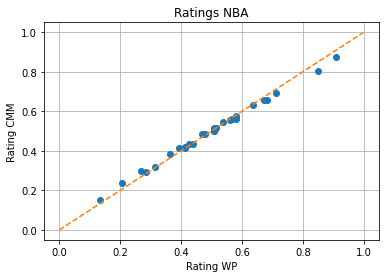

In [19]:
x = np.linspace(0, 1, 1000)
y = x

plt.title('Ratings NBA')
plt.plot(ratingWP, ratingCMM, 'o')
plt.plot(x, y, '--')
plt.plot()
plt.xlabel('Rating WP')
plt.ylabel('Rating CMM')
plt.grid()
plt.show()

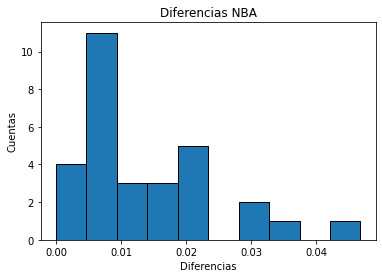

In [20]:
diferencias = np.abs(ratingCMM - ratingWP)
max_diferencia = np.max(diferencias)

plt.title('Diferencias NBA')
plt.hist(diferencias, 10, range=(0, max_diferencia), edgecolor='black')
plt.xlabel('Diferencias')
plt.ylabel('Cuentas')
plt.show()

### Veamos ahora qué pasa si un equipo que salió entre los últimos del ranking gana algunos partidos contra equipos que salieron entre los primeros del ranking y si un equipo que salió entre los primeros del ranking pierde algunos partidos contra equipos que salieron entre los últimos del ranking. Consideremos que Minnesota (que es el número 5 entre los peores) le gana un partido a Golden State, a San Antonio y a Cleveland, que son los tres mejores y consideremos que el Toronto (que es el número 4 entre los mejores) pierde contra e Philadelphia, LA Lakers y Brooklyn, que son los tres peores. Para esto hagamos un nuevo archivo .in llamado "nba_2016_scores_exp.in" que tenga los mismos partidos que la liga y los seis nuevos partidos que consideramos al final.

In [21]:
minnesota = int(teamsNBA.loc[teamsNBA['team'] == ' Minnesota']['id'])
golden_state = int(teamsNBA.loc[teamsNBA['team'] == ' Golden_State']['id'])
san_antonio = int(teamsNBA.loc[teamsNBA['team'] == ' San_Antonio']['id'])
cleveland = int(teamsNBA.loc[teamsNBA['team'] == ' Cleveland']['id'])
toronto = int(teamsNBA.loc[teamsNBA['team'] == ' Toronto']['id'])
philadelphia = int(teamsNBA.loc[teamsNBA['team'] == ' Philadelphia']['id'])
la_lakers = int(teamsNBA.loc[teamsNBA['team'] == ' LA_Lakers']['id'])
brooklyn = int(teamsNBA.loc[teamsNBA['team'] == ' Brooklyn']['id'])

file_exp = open('data/nba_2016_scores_exp.in', 'w+')
file = open('data/nba_2016_scores.in', 'r').readlines()

for i in range(len(file)):
    if i == 0:
        equipos = file[0][0:2]
        partidos = int(file[0][3:]) + 6
        file_exp.write(equipos + ' ' + str(partidos) + '\n')
    else:
        file_exp.write(file[i])

file_exp.write('2' + ' ' + str(minnesota) + ' ' + '1' + ' ' + str(golden_state) + ' ' + '0' + '\n')
file_exp.write('2' + ' ' + str(minnesota) + ' ' + '1' + ' ' + str(san_antonio) + ' ' + '0' + '\n')
file_exp.write('2' + ' ' + str(minnesota) + ' ' + '1' + ' ' + str(cleveland) + ' ' + '0' + '\n')
file_exp.write('2' + ' ' + str(toronto) + ' ' + '0' + ' ' + str(philadelphia) + ' ' + '0' + '\n')
file_exp.write('2' + ' ' + str(toronto) + ' ' + '0' + ' ' + str(la_lakers) + ' ' + '0' + '\n')
file_exp.write('2' + ' ' + str(toronto) + ' ' + '0' + ' ' + str(brooklyn) + ' ' + '0' + '\n')

file_exp.close()

In [22]:
runMethod('data/nba_2016_scores_exp.in', 0, 'data/nba_2016_scores_exp_0.out')
runMethod('data/nba_2016_scores_exp.in', 1, 'data/nba_2016_scores_exp_1.out')

In [23]:
fileCMM = open('data/nba_2016_scores_exp_0.out', 'r').readlines()
fileWP = open('data/nba_2016_scores_exp_1.out', 'r').readlines()
ratingCMM = []
ratingWP = []
for line in fileCMM:
    ratingCMM.append(float(line))
for line in fileWP:
    ratingWP.append(float(line))

teamsNBA.insert(4, 'ratingCMM (Exp)', ratingCMM)
teamsNBA.insert(5, 'ratingWP (Exp)', ratingWP)
display(teamsNBA)

,id,team,ratingCMM,ratingWP,ratingCMM (Exp),ratingWP (Exp)
0,1,Atlanta,0.558822,0.567164,0.559307,0.567164
1,2,Boston,0.565690,0.582090,0.565924,0.582090
2,3,Brooklyn,0.290736,0.283582,0.302121,0.294118
3,4,Charlotte,0.558224,0.560606,0.558125,0.560606
4,5,Chicago,0.516007,0.507692,0.514880,0.507692
5,6,Cleveland,0.692428,0.712121,0.680424,0.701493
6,7,Dallas,0.502178,0.507463,0.502992,0.507463
7,8,Denver,0.420858,0.411765,0.421581,0.411765
8,9,Detroit,0.500250,0.507463,0.499977,0.507463
9,10,Golden_State,0.874063,0.909091,0.859608,0.895522


In [24]:
print('------ Ranking CMM ------')
teamsNBA_ordered = teamsNBA.sort_values(by='ratingCMM (Exp)', ascending=False)
display(teamsNBA_ordered)

print('------ Ranking WP ------')
teamsNBA_ordered = teamsNBA.sort_values(by='ratingWP (Exp)', ascending=False)
display(teamsNBA_ordered)

------ Ranking CMM ------


,id,team,ratingCMM,ratingWP,ratingCMM (Exp),ratingWP (Exp)
9,10,Golden_State,0.874063,0.909091,0.859608,0.895522
26,27,San_Antonio,0.803976,0.850746,0.792490,0.838235
5,6,Cleveland,0.692428,0.712121,0.680424,0.701493
20,21,Oklahoma_City,0.655552,0.671642,0.657037,0.671642
12,13,LA_Clippers,0.629708,0.636364,0.629942,0.636364
27,28,Toronto,0.659347,0.681818,0.621636,0.652174
15,16,Miami,0.577367,0.582090,0.576535,0.582090
1,2,Boston,0.565690,0.582090,0.565924,0.582090
14,15,Memphis,0.563176,0.582090,0.564509,0.582090
0,1,Atlanta,0.558822,0.567164,0.559307,0.567164


------ Ranking WP ------


,id,team,ratingCMM,ratingWP,ratingCMM (Exp),ratingWP (Exp)
9,10,Golden_State,0.874063,0.909091,0.859608,0.895522
26,27,San_Antonio,0.803976,0.850746,0.792490,0.838235
5,6,Cleveland,0.692428,0.712121,0.680424,0.701493
20,21,Oklahoma_City,0.655552,0.671642,0.657037,0.671642
27,28,Toronto,0.659347,0.681818,0.621636,0.652174
12,13,LA_Clippers,0.629708,0.636364,0.629942,0.636364
15,16,Miami,0.577367,0.582090,0.576535,0.582090
1,2,Boston,0.565690,0.582090,0.565924,0.582090
14,15,Memphis,0.563176,0.582090,0.564509,0.582090
0,1,Atlanta,0.558822,0.567164,0.559307,0.567164


## EFL

### Veamos qué tanto se parecen los ratings de WP y CMM para los equipos de la EFL.

In [25]:
ratingWP = teamsEFL['ratingWP']
ratingCMM = teamsEFL['ratingCMM']

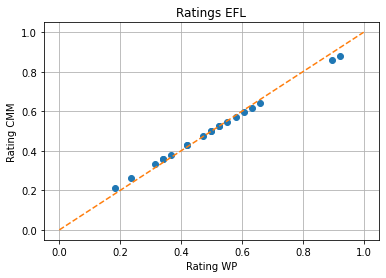

In [26]:
x = np.linspace(0, 1, 1000)
y = x

plt.title('Ratings EFL')
plt.plot(ratingWP, ratingCMM, 'o')
plt.plot(x, y, '--')
plt.plot()
plt.xlabel('Rating WP')
plt.ylabel('Rating CMM')
plt.grid()
plt.show()

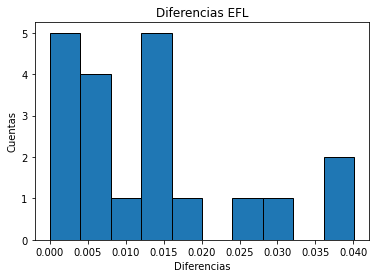

In [27]:
diferencias = np.abs(ratingCMM - ratingWP)
max_diferencia = np.max(diferencias)

plt.title('Diferencias EFL')
plt.hist(diferencias, 10, range=(0, max_diferencia), edgecolor='black')
plt.xlabel('Diferencias')
plt.ylabel('Cuentas')
plt.show()

### Veamos ahora qué pasa si un equipo que salió entre los últimos del ranking gana algunos partidos contra equipos que salieron entre los primeros del ranking y si un equipo que salió entre los primeros del ranking pierde algunos partidos contra equipos que salieron entre los últimos del ranking. Consideremos que Southampton (que es el número 4 entre los peores) le gana un partido al Liverpool, al Manchester City y al Arsenal, que son los tres mejores y consideremos que el Chelsea (que es el número 4 entre los mejores) pierde contra el Huddersfield, Fulham y Cardiff, que son los tres peores. Para esto hagamos un nuevo archivo .in llamado "Liga_Inglesa_exp.in" que tenga los mismos partidos que la liga y los seis nuevos partidos que consideramos al final.

In [28]:
southampton = int(teamsEFL.loc[teamsEFL['team'] == 'Southampton']['id'])
liverpool = int(teamsEFL.loc[teamsEFL['team'] == 'Liverpool']['id'])
manchester = int(teamsEFL.loc[teamsEFL['team'] == 'Man City']['id'])
arsenal = int(teamsEFL.loc[teamsEFL['team'] == 'Arsenal']['id'])
chelsea = int(teamsEFL.loc[teamsEFL['team'] == 'Chelsea']['id'])
huddersfield = int(teamsEFL.loc[teamsEFL['team'] == 'Huddersfield']['id'])
fulham = int(teamsEFL.loc[teamsEFL['team'] == 'Fulham']['id'])
cardiff = int(teamsEFL.loc[teamsEFL['team'] == 'Cardiff']['id'])

file_exp = open('data/Liga_Inglesa_exp.in', 'w+')
file = open('data/Liga_Inglesa.in', 'r').readlines()

for i in range(len(file)):
    if i == 0:
        equipos = file[0][0:2]
        partidos = int(file[0][3:]) + 6
        file_exp.write(equipos + ' ' + str(partidos) + '\n')
    else:
        file_exp.write(file[i])

file_exp.write('2' + ' ' + str(southampton) + ' ' + '1' + ' ' + str(liverpool) + ' ' + '0' + '\n')
file_exp.write('2' + ' ' + str(southampton) + ' ' + '1' + ' ' + str(manchester) + ' ' + '0' + '\n')
file_exp.write('2' + ' ' + str(southampton) + ' ' + '1' + ' ' + str(arsenal) + ' ' + '0' + '\n')
file_exp.write('2' + ' ' + str(chelsea) + ' ' + '0' + ' ' + str(huddersfield) + ' ' + '0' + '\n')
file_exp.write('2' + ' ' + str(chelsea) + ' ' + '0' + ' ' + str(fulham) + ' ' + '0' + '\n')
file_exp.write('2' + ' ' + str(chelsea) + ' ' + '0' + ' ' + str(cardiff) + ' ' + '0' + '\n')

file_exp.close()

In [29]:
runMethod('data/Liga_Inglesa_exp.in', 0, 'data/Liga_Inglesa_exp_0.out')
runMethod('data/Liga_Inglesa_exp.in', 1, 'data/Liga_Inglesa_exp_1.out')

In [30]:
fileCMM = open('data/Liga_Inglesa_exp_0.out', 'r').readlines()
fileWP = open('data/Liga_Inglesa_exp_1.out', 'r').readlines()
ratingCMM = []
ratingWP = []
for line in fileCMM:
    ratingCMM.append(float(line))
for line in fileWP:
    ratingWP.append(float(line))

teamsEFL.insert(5, 'ratingCMM (Exp)', ratingCMM)
teamsEFL.insert(6, 'ratingWP (Exp)', ratingWP)
display(teamsEFL)

,id,team,ratingCMM,ratingWP,ratingSO,ratingCMM (Exp),ratingWP (Exp)
0,1,Man United,0.571429,0.578947,66.0,0.571429,0.578947
1,2,Leicester,0.500000,0.500000,57.0,0.500000,0.500000
2,3,Bournemouth,0.380952,0.368421,42.0,0.380952,0.368421
3,4,Cardiff,0.333333,0.315789,36.0,0.350318,0.333333
4,5,Fulham,0.261905,0.236842,27.0,0.280550,0.256410
5,6,Crystal Palace,0.428571,0.421053,48.0,0.428571,0.421053
6,7,Huddersfield,0.214286,0.184211,21.0,0.234039,0.205128
7,8,Chelsea,0.619048,0.631579,72.0,0.563665,0.585366
8,9,Newcastle,0.523810,0.526316,60.0,0.523810,0.526316
9,10,Tottenham,0.595238,0.605263,69.0,0.595238,0.605263


In [31]:
print('------ Ranking CMM ------')
teamsEFL_ordered = teamsEFL.sort_values(by='ratingCMM (Exp)', ascending=False)
display(teamsEFL_ordered)

print('------ Ranking WP ------')
teamsEFL_ordered = teamsEFL.sort_values(by='ratingWP (Exp)', ascending=False)
display(teamsEFL_ordered)

------ Ranking CMM ------


,id,team,ratingCMM,ratingWP,ratingSO,ratingCMM (Exp),ratingWP (Exp)
16,17,Liverpool,0.880952,0.921053,105.0,0.858563,0.897436
15,16,Man City,0.857143,0.894737,102.0,0.835307,0.871795
14,15,Arsenal,0.642857,0.657895,75.0,0.626005,0.641026
9,10,Tottenham,0.595238,0.605263,69.0,0.595238,0.605263
0,1,Man United,0.571429,0.578947,66.0,0.571429,0.578947
7,8,Chelsea,0.619048,0.631579,72.0,0.563665,0.585366
12,13,Wolves,0.547619,0.552632,63.0,0.547619,0.552632
13,14,Everton,0.523810,0.526316,60.0,0.523810,0.526316
8,9,Newcastle,0.523810,0.526316,60.0,0.523810,0.526316
1,2,Leicester,0.500000,0.500000,57.0,0.500000,0.500000


------ Ranking WP ------


,id,team,ratingCMM,ratingWP,ratingSO,ratingCMM (Exp),ratingWP (Exp)
16,17,Liverpool,0.880952,0.921053,105.0,0.858563,0.897436
15,16,Man City,0.857143,0.894737,102.0,0.835307,0.871795
14,15,Arsenal,0.642857,0.657895,75.0,0.626005,0.641026
9,10,Tottenham,0.595238,0.605263,69.0,0.595238,0.605263
7,8,Chelsea,0.619048,0.631579,72.0,0.563665,0.585366
0,1,Man United,0.571429,0.578947,66.0,0.571429,0.578947
12,13,Wolves,0.547619,0.552632,63.0,0.547619,0.552632
13,14,Everton,0.523810,0.526316,60.0,0.523810,0.526316
8,9,Newcastle,0.523810,0.526316,60.0,0.523810,0.526316
1,2,Leicester,0.500000,0.500000,57.0,0.500000,0.500000
